In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size
# utils
from evaluation.classification.utils import get_size_list_from_xte
%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_freeze/validation_matrix.csv')

In [3]:
resnet50_not_pretrained_precisions = get_precisions(resnet50_not_pretrained)
resnet50_pretrained_freeze_precisions = get_precisions(resnet50_pretrained_freeze)
resnet50_pretrained_precisions = get_precisions(resnet50_pretrained)

In [4]:
exp_name = ["resnet50_not_pretrained", "resnet50_pretrained_freeze", "resnet50_pretrained"]
exp_ap = [resnet50_not_pretrained_precisions.mean(), resnet50_pretrained_freeze_precisions.mean(), resnet50_pretrained_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50_not_pretrained,0.506048
1,resnet50_pretrained_freeze,0.617119
2,resnet50_pretrained,0.878885


In [6]:
df_per_label = pd.DataFrame({"resnet50_not_pretrained": resnet50_not_pretrained_precisions, "resnet50_pretrained_freeze": resnet50_pretrained_freeze_precisions, "resnet50_pretrained": resnet50_pretrained_precisions})

In [7]:
new_df_per_label = pd.DataFrame()
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[1], index=df_per_label.columns, name='Ephemeridae'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[4], index=df_per_label.columns, name='Plecoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[2], index=df_per_label.columns, name='Ephemeroptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[5], index=df_per_label.columns, name='Trichoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[3], index=df_per_label.columns, name='Lepidoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[0], index=df_per_label.columns, name='Diptera'))
new_df_per_label

,resnet50_not_pretrained,resnet50_pretrained,resnet50_pretrained_freeze
Ephemeridae,0.529412,0.960784,0.784314
Plecoptera,0.328358,0.823077,0.432836
Ephemeroptera,0.405000,0.764045,0.420000
Trichoptera,0.440000,0.911290,0.616000
Lepidoptera,0.588889,0.887640,0.633333
Diptera,0.744630,0.926471,0.816229


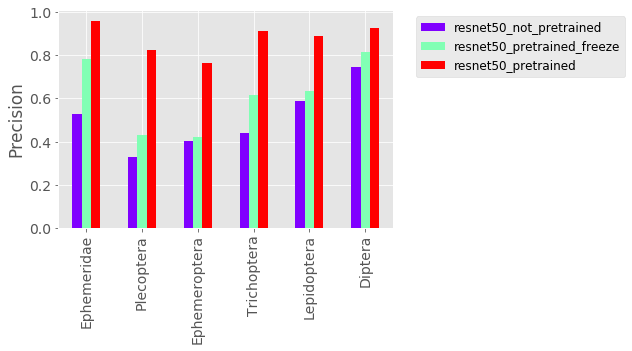

In [8]:
plt.rcParams["font.size"] = 14
new_df_per_label.plot(kind="bar", y=["resnet50_not_pretrained", "resnet50_pretrained_freeze", "resnet50_pretrained"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [10]:
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/all_size_df.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')
resnet50_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_freeze/all_size_df.csv')

In [11]:
resnet50_not_pretrained = resnet50_not_pretrained.drop(resnet50_not_pretrained.index[[0]])
resnet50_pretrained_freeze = resnet50_pretrained_freeze.drop(resnet50_pretrained_freeze.index[[0]])
resnet50_pretrained = resnet50_pretrained.drop(resnet50_pretrained.index[[0]])

In [12]:
insect_size_df

,order,count
0,1.0,1
1,7.0,10
2,8.0,43
3,9.0,109
4,10.0,229
5,11.0,284
6,12.0,309
7,13.0,209
8,14.0,78
9,15.0,10


In [13]:
all_df = resnet50_not_pretrained
all_df = all_df.rename(columns={'Accuracy': 'resnet50_not_pretrained'})
all_df = all_df.assign(resnet50_pretrained_freeze=resnet50_pretrained_freeze["Accuracy"])
all_df = all_df.assign(resnet50_pretrained=resnet50_pretrained["Accuracy"])
all_df = all_df.assign(count=insect_size_df["count"])
all_df

,order,resnet50_not_pretrained,Insect_size,order.1,resnet50_pretrained_freeze,resnet50_pretrained,count
1,7.0,1.000000,205.833333,7.0,0.916667,1.000000,10
2,8.0,0.862745,395.039216,8.0,0.705882,0.883721,43
3,9.0,0.503937,770.850394,9.0,0.535433,0.761468,109
4,10.0,0.343220,1504.529661,10.0,0.423729,0.812227,229
5,11.0,0.396552,2941.368966,11.0,0.565517,0.855634,284
6,12.0,0.654839,5934.145161,12.0,0.780645,0.932039,309
7,13.0,0.732057,11264.789474,13.0,0.822967,0.971292,209
8,14.0,0.705128,22344.653846,14.0,0.628205,0.948718,78
9,15.0,0.600000,34865.400000,15.0,0.700000,0.800000,10


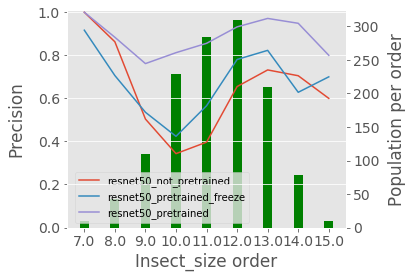

In [14]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50_not_pretrained"], label="resnet50_not_pretrained")
ax2.plot(x_label, all_df["resnet50_pretrained_freeze"], label="resnet50_pretrained_freeze")
ax2.plot(x_label, all_df["resnet50_pretrained"], label="resnet50_pretrained")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.67, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/compare_precision_distrib_of_size.png", bbox_inches="tight")

### --- class distribution of size ---

In [15]:
with h5py.File("/home/tanida/workspace/Insect_Phenology_Detector/data/all_classification_data/classify_insect_std_aquatic") as f:
    X = f["X"][:]
    Y = f["Y"][:]

In [16]:
X = np.transpose(X, (0,3,1,2))

In [17]:
size_list = get_size_list_from_xte(X)

In [18]:
gt_size_df = pd.DataFrame({"gt_class": Y, "Insect_size": size_list})

In [19]:
gt_size_df["order"] = gt_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))

In [20]:
label2name = {
    0: "Diptera",
    1: "Ephemeridae",
    2: "Ephemeroptera",
    3: "Lepidoptera",
    4: "Plecoptera",
    5: "Trichoptera"
}

In [21]:
def get_sorted_value_of_order(gt_size_df, order):
    order_df = gt_size_df[gt_size_df["order"] == order]
    order_class = np.asarray(order_df["gt_class"])
    order_idx, order_count = np.unique(order_class, return_counts=True)
    order_count_sorted_idx = np.argsort(order_count)
    sorted_order_idx = order_idx[order_count_sorted_idx]
    sorted_order_count = order_count[order_count_sorted_idx]
    return sorted_order_idx[::-1], sorted_order_count[::-1]

[0]
[12]


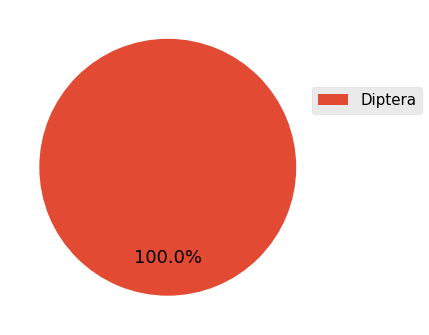

In [22]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 7.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_7_class.png", bbox_inches="tight")

[0 2 4]
[36 13  2]


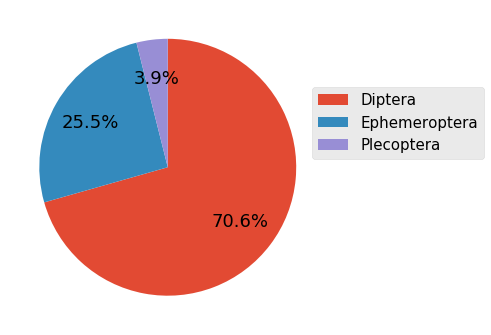

In [23]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 8.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_8_class.png", bbox_inches="tight")

[2 0 5 4 3]
[56 42 12  9  8]


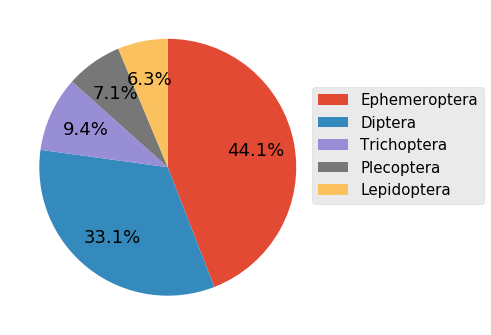

In [24]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 9.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_9_class.png", bbox_inches="tight")

[2 4 5 0 3]
[65 60 47 39 25]


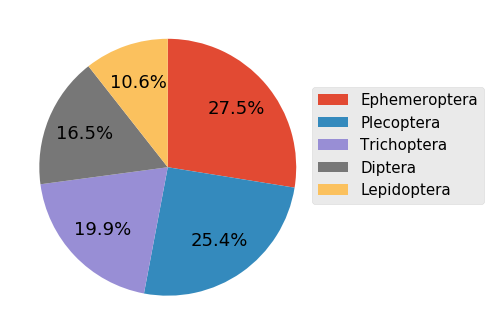

In [25]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 10.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_10_class.png", bbox_inches="tight")

[5 3 4 0 2]
[108  51  47  45  39]


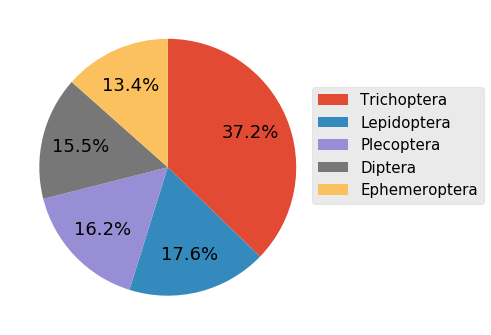

In [26]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 11.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_11_class.png", bbox_inches="tight")

[0 3 5 2 1 4]
[112  91  73  19  11   4]


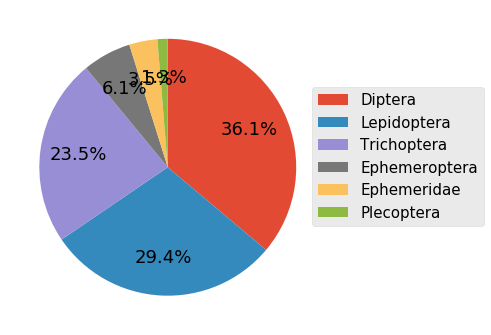

In [27]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 12.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_12_class.png", bbox_inches="tight")

[0 3 1 5 2 4]
[122  41  29  10   4   3]


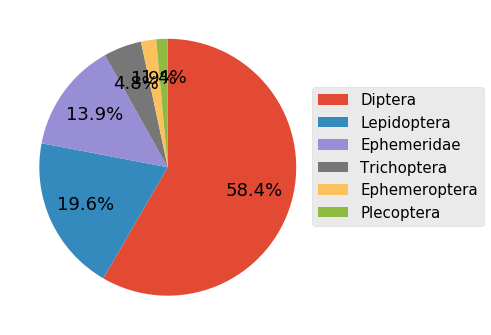

In [28]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 13.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_13_class.png", bbox_inches="tight")

[3 1 0 4 2]
[46 11 10  8  3]


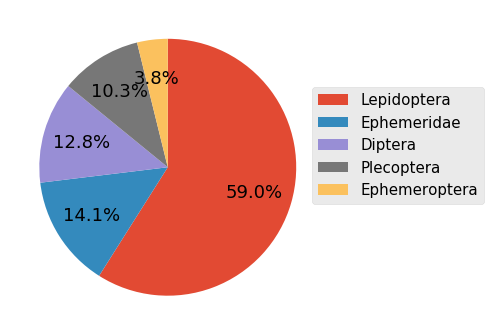

In [29]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 14.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_14_class.png", bbox_inches="tight")

[3 4 2 0]
[7 1 1 1]


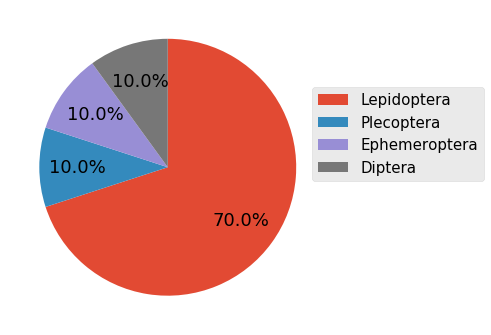

In [30]:
sorted_order_idx, sorted_order_count = get_sorted_value_of_order(gt_size_df, 15.0)
print(sorted_order_idx)
print(sorted_order_count)
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor("white")
wedges, texts, autotexts = plt.pie(sorted_order_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, [label2name[idx] for idx in sorted_order_idx], bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_finetuning/order_15_class.png", bbox_inches="tight")